<a href="https://colab.research.google.com/github/aivizionz/EIP4-Session1/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


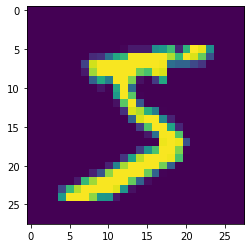

In [245]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [248]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [250]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [257]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(512, 3, 3, activation='relu' , input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(512, 3, 3, activation='relu' ))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(512, 3, 3, activation='relu' ))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(512, 1, 1, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [258]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_248 (Conv2D)          (None, 26, 26, 512)       5120      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 13, 13, 512)       0         
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 11, 11, 512)       2359808   
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 5, 5, 512)         0         
_________________________________________________________________
conv2d_250 (Conv2D)          (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
conv2d_251 (Conv2D)          (None, 1, 1, 512)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [260]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.1385 - acc: 0.9564
Epoch 2/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.0513 - acc: 0.9844
Epoch 3/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0390 - acc: 0.9881
Epoch 4/10
60000/60000 [==============================] - 27s 443us/step - loss: 0.0278 - acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0245 - acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 27s 442us/step - loss: 0.0192 - acc: 0.9941
Epoch 7/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0171 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 27s 443us/step - loss: 0.0165 - acc: 0.9950
Epoch 9/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0147 - acc: 0.9958
Epoch 10/10
60000/60000 [==============================] - 26s 441us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [262]:
print(score)

[0.051866900845787496, 0.9907]


In [0]:
y_pred = model.predict(X_test)

In [264]:
print(y_pred[:9])
print(y_test[:9])

[[1.64204580e-19 1.53910858e-12 1.15743792e-09 1.44282210e-13
  1.20542534e-11 1.00633044e-13 7.04323573e-24 1.00000000e+00
  1.23433280e-20 6.46713721e-15]
 [7.05556499e-20 2.21878941e-17 1.00000000e+00 8.98216560e-13
  9.12932617e-20 2.74196489e-22 3.96581017e-19 4.11703573e-17
  2.10266959e-19 7.64037925e-30]
 [8.13281300e-12 1.00000000e+00 8.22073394e-14 1.93421625e-15
  2.90363897e-13 5.69035152e-10 1.26633025e-13 1.64263338e-13
  1.99058672e-10 3.36333146e-16]
 [1.00000000e+00 2.53919814e-19 8.05731302e-19 1.66303602e-21
  7.31212721e-19 2.72953100e-18 4.50041437e-15 3.37587194e-19
  2.73521166e-18 4.97413183e-17]
 [1.32354581e-17 3.29988480e-19 2.19377522e-18 4.02360942e-19
  1.00000000e+00 1.29076687e-17 5.46350015e-15 7.79444536e-19
  5.89861585e-18 3.17319332e-13]
 [3.14653300e-15 1.00000000e+00 6.45704507e-18 1.18872808e-19
  6.90010443e-17 9.45227078e-13 2.66344485e-18 6.44570632e-16
  3.51964090e-13 8.88270486e-20]
 [4.43211022e-16 2.73474768e-14 2.83653546e-15 3.68289587e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [266]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_248'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyboardInterrupt: ignored